#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks.
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

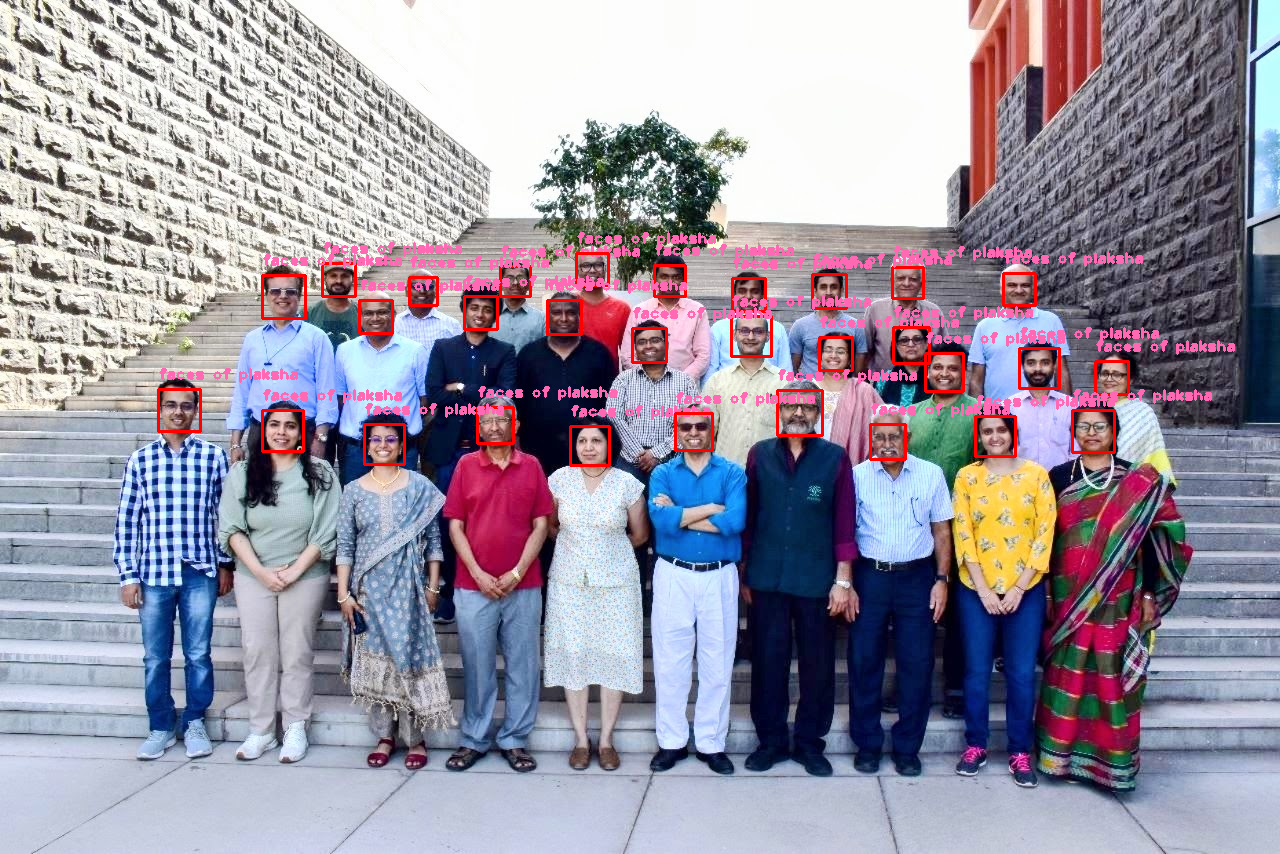

In [8]:
## Reading the image plaksha_Faculty.jpg
img= cv2.imread('/content/Plaksha_Faculty.jpg')

## Convert the image to grayscale
gray_img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Downloading the Haar Cascade XML file
import os
if not os.path.exists('haarcascade_frontalface_default.xml'):
    !wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image.
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Define the text and font parameters
text = "faces of plaksha" ## The text you want to write
font = cv2.FONT_HERSHEY_PLAIN  ## Font type
font_scale = 1  ## Font scale factor
font_color = (180, 105, 255) ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

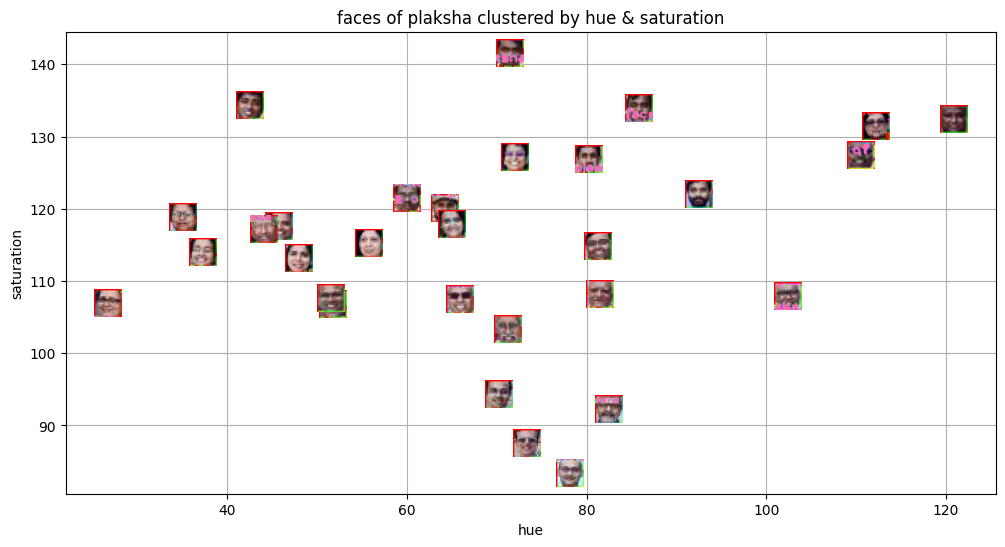

In [10]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('faces of plaksha clustered by hue & saturation')
plt.grid(True)
plt.show()

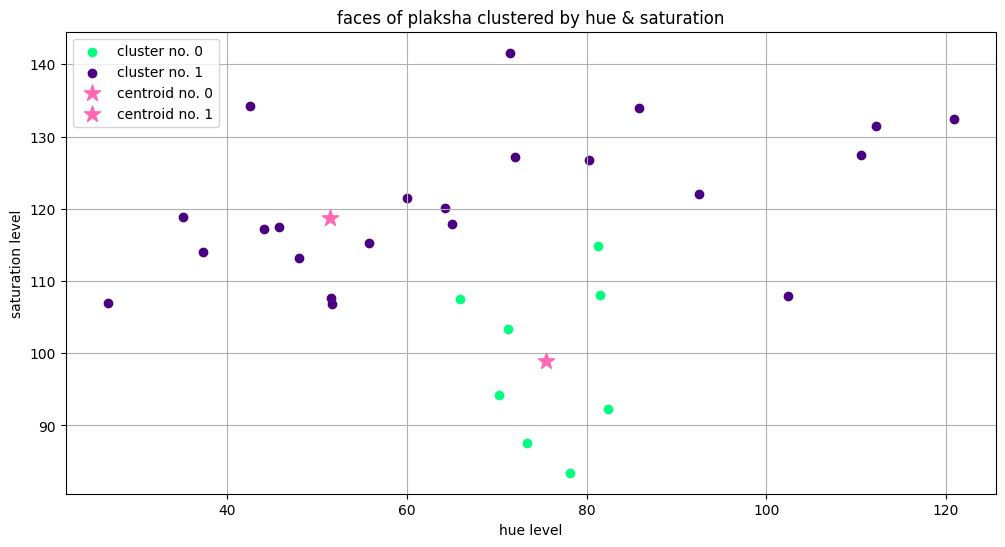

In [15]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='springgreen', label='cluster no. 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='indigo', label='cluster no. 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1
plt.scatter(centroid_0[0], centroid_0[1], c='hotpink', marker='*', s=150, label='centroid no. 0')
plt.scatter(centroid_1[0], centroid_1[1], c='hotpink', marker='*', s=150, label='centroid no. 1')

plt.xlabel('hue level')
plt.ylabel('saturation level')
plt.title('faces of plaksha clustered by hue & saturation')
plt.legend()
plt.grid(True)
plt.show()


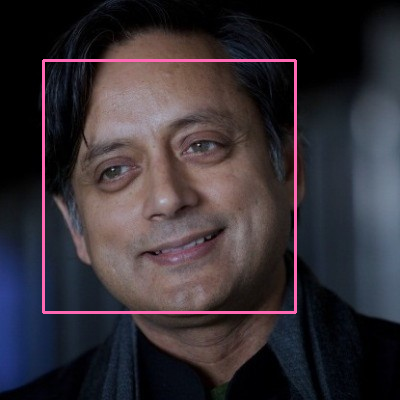

In [19]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('/content/Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY), scaleFactor=1.1, minNeighbors=5)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (180, 105, 255), 2)
from google.colab.patches import cv2_imshow #since im using google colab
cv2_imshow(template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

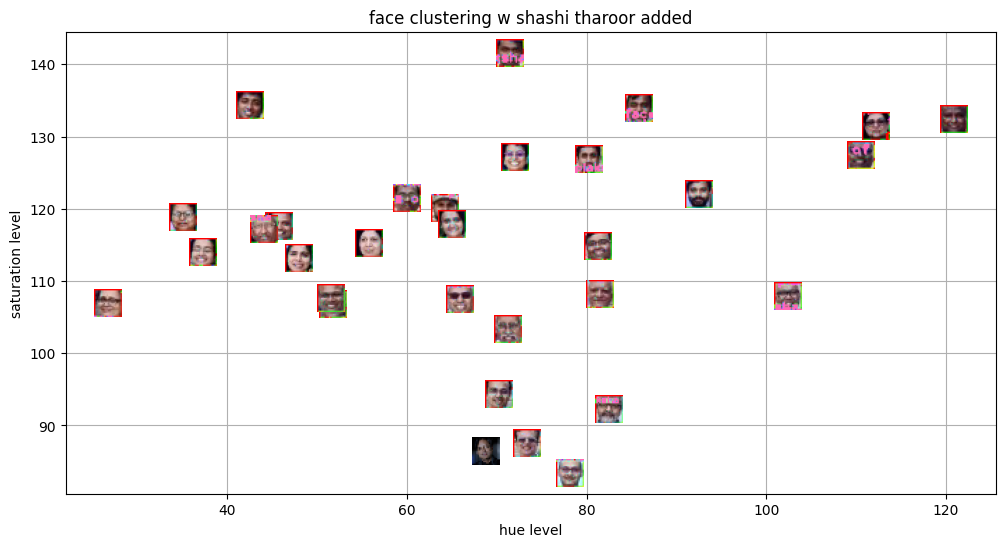

In [22]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel('hue level')
plt.ylabel('saturation level')
plt.title('face clustering w shashi tharoor added')
plt.grid(True)
plt.show()

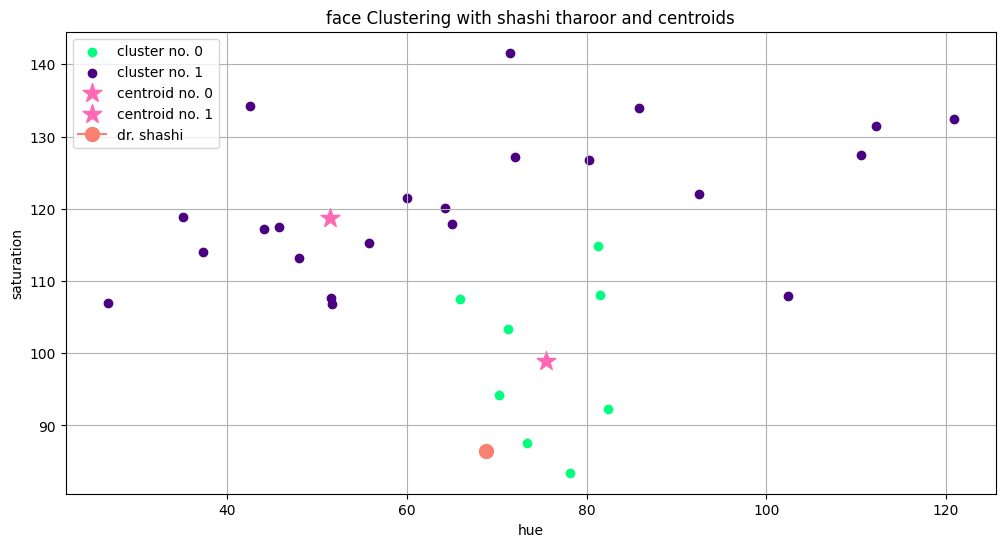

In [30]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='springgreen', label='cluster no. 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='indigo', label='cluster no. 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], c='hotpink', marker='*', s=200, label='centroid no. 0')
plt.scatter(centroid_1[0], centroid_1[1], c='hotpink', marker='*', s=200, label='centroid no. 1')
plt.plot(template_hue, template_saturation, marker='o', c='salmon',markersize= 10, label='dr. shashi' )

plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('face Clustering with shashi tharoor and centroids')
plt.legend()
plt.grid(True)
plt.show()

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms?

#### 2. What are some real-world applications of distance-based classification algorithms?

#### 3. Explain various distance metrics.

#### 4. What is the role of cross validation in model performance?

#### 5. Explain variance and bias in terms of KNN?

# ***report***

**1. What are the common distance metrics used in distance-based classification algorithms?**
- Euclidean distance

- Manhattan distance

- Mahalanobis distance
- Chebyshev distance
- Minkowski distance

- Cosine distance
- Hamming distance

**2. What are some real-world applications of distance-based classification algorithms?**

Distance-based classification algorithms have thousands of real-world applications including:

- customer behavior prediction
- spam Filtering
- Face recognition
- image sentiment analysis
- emotion classification
- anomaly and fraud detection
- language sentiment Analysis
- disease classification
- speech recognition
- autonomous Driving


**3. Explain various distance metrics.**

**Euclidean distance**: represents the shortest distance between two vectors, calculated as the square root of the sum of squared differences.

**Manhattan distance**: distance measured along axes at right angles. works better in high dimensional spaces due to sparsity.

**Mahalanobis distance**: Measures how many standard deviations away a point P is from the mean of distribution D. Advantages are taking variance into account, being unitless and scale-invariant, and accounting for correlations. when covariance is the identity matrix, it equals Euclidean distance.

**Chebyshev distance**:It is defined on a vector space where the distance between two
vectors is the greatest of their differences along any coordinate
dimension.

**Minkowski Distance**: A generalized metric that can be modified by substituting the value of 'p'. Different p values give different distance metrics.

**Cosine Distance**: Measures the angle between two vectors when magnitude doesn't matter but orientation does. Useful when similar objects may be far apart in magnitude but have small angles between them.

**Hamming Distance**: Counts the number of positions where two strings or bits are different. measures minimum substitutions required to change one string into another.

**4. What is the role of cross validation in model performance?**

- helping determine the optimal value of K in K-NN algorithm through repeated validation
- training and validation set is randomly split multiple times (usually 10 times) to validate the ML model repeatedly before testing on the test set
- allows observation of validation error as a performance metric for different K values
- Helps prevent both overfitting (when k is too small) and underfitting (when K is too large)

**5. Explain variance and bias in terms of KNN?**

In K-NN, the value of K directly affects bias and variance. When K is very low like K=1 or K=2, the model has high variance and low bias. On the other hand, when K is too large, we get high bias and low variance, which causes underfitting. the optimal K value is found through validation by checking validation error for different K values, and it balances both bias and variance so the model neither overfits nor underfits.